In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import CLASSIFIERS

In [2]:
diabetes = pd.read_csv(r'C:\Users\Lucas\Desktop\projeto 2\diabetes_binary_health_indicators_BRFSS2015.csv', sep = ',')
print('Shape', diabetes.shape)

Shape (253680, 22)


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
diabetes['Diabetes_binary'] = diabetes['Diabetes_binary'].astype(int)

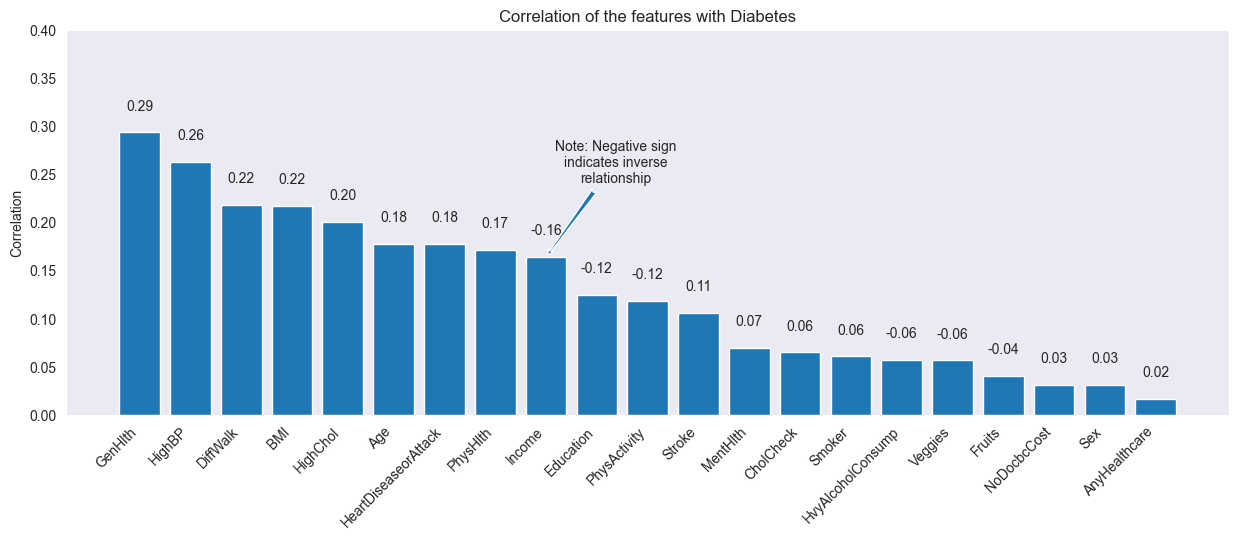

In [5]:
# Calculate the correlation coefficients
corr_values = diabetes.corr()['Diabetes_binary'].drop('Diabetes_binary')
abs_corr_values = abs(corr_values)
labels = corr_values.index

# Sorting the correlation coefficients by absolute value in descending order
sort_index = np.argsort(abs_corr_values)[::-1]
labels = labels[sort_index]
abs_corr_values = abs_corr_values[sort_index]
corr_values = corr_values[sort_index]

#Set the style
sns.set_style('dark')

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(labels, abs_corr_values)
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{corr_values[i]:.2f}", ha='center', va='bottom')
    if i == 8 and corr_values[i] < 0:
        ax.annotate('Note: Negative sign\nindicates inverse\nrelationship',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(50, 85), textcoords='offset points',
                    ha='center', va='top', arrowprops=dict(arrowstyle='fancy'))
        
ax.set_title('Correlation of the features with Diabetes')
ax.set_ylabel('Correlation')
ax.set_ylim([0, 0.4])
ax.set_xticklabels(labels = labels, rotation=45, ha='right')
plt.show()


- Machine Learning

In [6]:
x = diabetes.drop('Diabetes_binary', axis = 1)
y = diabetes['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [7]:
#Sampling for speed testing purposes
train_size = int(0.1 * len(x_train))
x_train_sample, y_train_sample = x_train[:train_size], y_train[:train_size]

In [8]:
#Wanted classifiers, just as a reminder
#classifiers = ['LinearDiscriminantAnalysis', 'AdaBoostClassifier', 'XGBClassifier', 'LGBMClassifier', 'LogisticRegression', 
#'RandomForestClassifier', 'ExtraTreesClassifier', 'LinearSVC', 'CalibratedClassifierCV', 'RidgeClassifierCV', 'DummyClassifier']

In [9]:
#Printing the classifiers indices in CLASSIFIERS
#for x , i in zip(CLASSIFIERS, range(len(CLASSIFIERS))):
#    print('{0} {1}'.format(i, x))

In [10]:
#The selected models were based on their performance and execution speed, after testing them with the samples.
desired_classes = [13, 0, 27, 28, 15, 21, 8, 14, 3, 23, 6]

In [11]:
lazypredict.Supervised.CLASSIFIERS = [CLASSIFIERS[p] for p in list(desired_classes)]

In [12]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None, predictions = False, random_state = 10)
models = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 11/11 [04:21<00:00, 23.75s/it]


(                            Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                        
 LinearDiscriminantAnalysis      0.86               0.58     0.58      0.83   
 AdaBoostClassifier              0.87               0.58     0.58      0.84   
 RandomForestClassifier          0.86               0.57     0.57      0.83   
 XGBClassifier                   0.86               0.57     0.57      0.83   
 ExtraTreesClassifier            0.85               0.57     0.57      0.82   
 CalibratedClassifierCV          0.86               0.57     0.57      0.83   
 LogisticRegression              0.86               0.56     0.56      0.83   
 LGBMClassifier                  0.87               0.56     0.56      0.83   
 LinearSVC                       0.86               0.53     0.53      0.81   
 RidgeClassifierCV               0.86               0.52     0.52      0.81   
 DummyClassifier                 0.86               

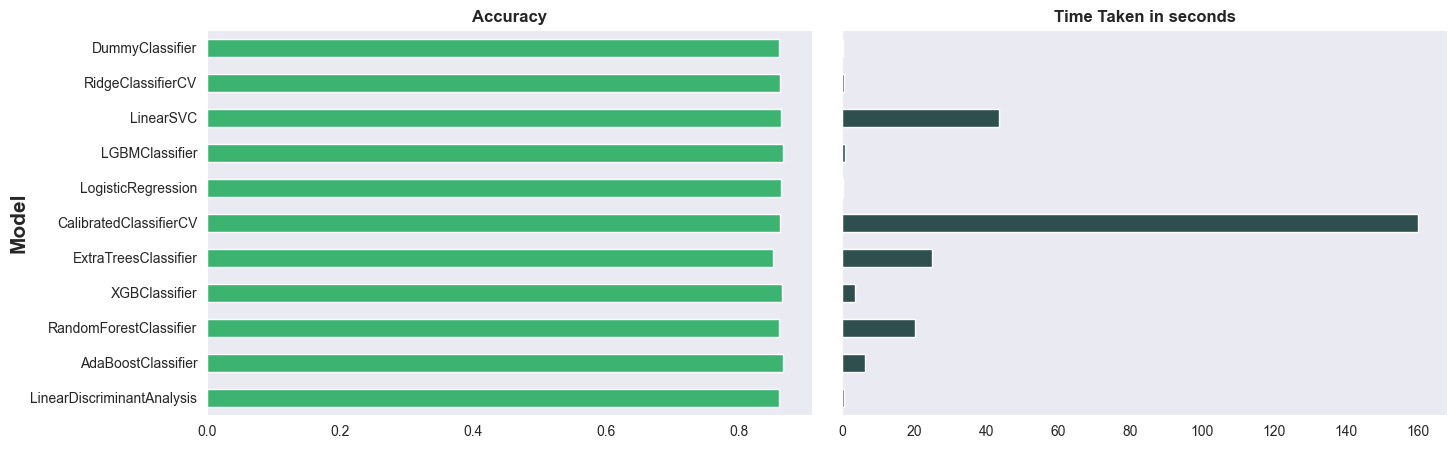

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
models[1].Accuracy.plot(ax = axes[0], kind = 'barh', color = 'Mediumseagreen')
axes[0].set_ylabel('Model', labelpad=1, rotation=90, ha='center', fontsize=15, fontweight = 'bold')
axes[0].set_title('Accuracy', fontweight='bold')
models[1]['Time Taken'].plot(ax = axes[1], kind = 'barh', color = 'darkslategrey')
axes[1].set_title('Time Taken in seconds', fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_yticklabels('')
plt.subplots_adjust(wspace=0.05)
plt.show()

In [14]:
#Normalizing the features does not improved performance.

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#diabetes_norm = scaler.fit_transform(diabetes)
#x_norm = diabetes.drop('Diabetes_binary', axis = 1)
#y_norm = diabetes['Diabetes_binary']
#x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm, y_norm, test_size=0.20, random_state=1)
#clf_norm = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None, predictions = False, random_state = 10)
#models_normalized = clf_norm.fit(x_norm_train, x_norm_test, y_norm_train, y_norm_test)
#models_normalized

I decided to use AdaBoostClassifier, XGBClassifier, and LGBMClassifier based on the outcomes. They are three boosting classifiers and my plan is to enhance the results by adjusting their parameters.

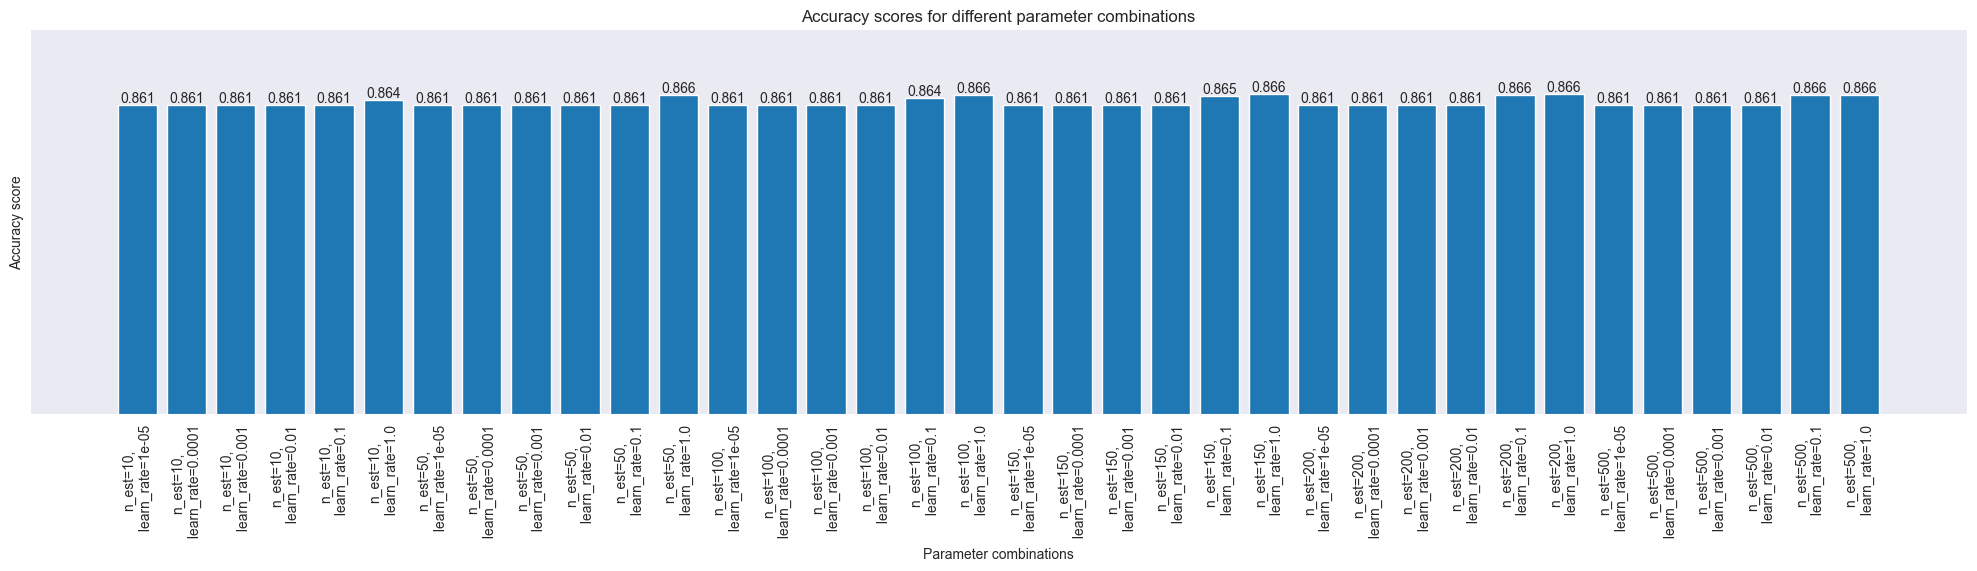

In [15]:
##AdaBoostClassifier

#Evaluating the classifier accuracy with test samples
from sklearn.ensemble import AdaBoostClassifier
n_estimators_list = [10, 50, 100, 150, 200, 500]
learning_rate_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
scores = []
parameter_labels = []
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        ada.fit(x_train, y_train)
        accuracy = ada.score(x_test, y_test)
        scores.append(accuracy)
        parameter_labels.append(f'n_est={n_estimators},\n learn_rate={learning_rate}')
        
# Create a bar plot to compare the different parameter values
x_pos = np.arange(len(parameter_labels))
plt.figure(figsize=(25,5))
plt.bar(x_pos, scores)
plt.xticks(x_pos, parameter_labels, rotation=90)
plt.xlabel('Parameter combinations')
plt.ylabel('Accuracy score')
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.title('Accuracy scores for different parameter combinations')
plt.ylim(0.7, 0.9)
for i, score in enumerate(scores):
    plt.text(x_pos[i], score, f'{score:.3f}', ha='center', va='bottom')
plt.show()

Adaboostclassifier did not show any performance improvement with parameter variations. I also tested other base_estimators, such as logistic regression, and there were no improvements.
Accuracy remained around 0.86-0.87.

In [68]:
##XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,8,2)
    }
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(x_train_sample, y_train_sample)
print(gsearch1.best_params_ , gsearch1.best_score_)

0.864435509303059

In [44]:
from sklearn.model_selection import GridSearchCV
param_test2 = {
    'max_depth':[2,3,4], 
    'min_child_weight':[0,1,2]
    }
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test2, scoring='accuracy',n_jobs=4, cv=5)
gsearch2.fit(x_train_sample, y_train_sample)
print(gsearch2.best_params_ , gsearch2.best_score_)

{'max_depth': 2, 'min_child_weight': 1} 0.8652803868421317


In [50]:
from sklearn.model_selection import GridSearchCV
param_test2b = {
    'min_child_weight':[6,8,9,10]
    }
gsearch2b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test2b, scoring='accuracy',n_jobs=4, cv=5)
gsearch2b.fit(x_train_sample, y_train_sample)
print(gsearch2b.best_params_ , gsearch2b.best_score_)

{'min_child_weight': 6} 0.8651325550398745


In [53]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
 }
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(x_train_sample, y_train_sample)
print(gsearch3.best_params_ , gsearch3.best_score_)

{'gamma': 0.3} 0.8654775040066365


In [61]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(x_train_sample, y_train_sample)
print(gsearch4.best_params_ , gsearch4.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.9} 0.8661181287201554


In [64]:
param_test5 = {
 'learning_rate':[0.0001, 0.001, 0.01, 0.1]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)
gsearch5.fit(x_train_sample, y_train_sample)
print(gsearch5.best_params_ , gsearch5.best_score_)

{'learning_rate': 0.1} 0.8661181287201554


In [ ]:
from sklearn.metrics import accuracy_score
xgb_clf = XGBClassifier(learning_rate =0.1, 
                        n_estimators=1000,
                        max_depth=2,
                        min_child_weight=1,
                        gamma=0.3,
                        subsample=0.9,
                        colsample_bytree=0.9,
                        objective= 'binary:logistic',
                        nthread=4,
                        scale_pos_weight=1,
                        seed=27)
xgb_clf.fit(x_train_sample, y_train_sample)
y_pred = xgb_clf.predict(x_test)
accuracy_score(y_test, y_pred)

Despite multiple attempts at feature engineering to improve the accuracy, it remained at approximately 0.86.